# Notes

Cleaned-up code fitting the normalised histograms of the DM contributions from Halos, Filaments and Voids vs redshift which were created in raven:/u/cwalker/Illustris_Zhang_Method/Pipe_Analysis_5.ipynb under the subheading 'Histograms of results'.

# Imports

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.modeling import models, fitting
from scipy import stats
from astropy.modeling.models import custom_model
from scipy.stats import skewnorm,gumbel_l,norm
from scipy.signal import convolve
from scipy.integrate import simps
from scipy.interpolate import interp1d

# Load the histogram data

In [127]:
sim_to_load = 'TNG300-1'

#load list of redshifts histograms were originally made for
snap_z_list = np.load('Paper_DM-z_Hists_Redshifts_{0}.npy'.format(sim_to_load))

#load the bin edges
bin_edges = np.load('Paper_DM-z_Hists_BinEdges_{0}.npy'.format(sim_to_load))

#load the histogrammed counts

#normalised histograms

counts_Pakmor = np.load('Paper_DM-z_Hists_TotCounts_{0}.npy'.format(sim_to_load)) #Total DM
Hal_counts_Pakmor = np.load('Paper_DM-z_Hists_HalCounts_{0}.npy'.format(sim_to_load)) #DM in Halos
Fil_counts_Pakmor = np.load('Paper_DM-z_Hists_FilCounts_{0}.npy'.format(sim_to_load)) #DM in Filaments
Voi_counts_Pakmor = np.load('Paper_DM-z_Hists_VoiCounts_{0}.npy'.format(sim_to_load)) #DM in Voids

#unnormalised histograms

#counts_Pakmor = np.load('Paper_DM-z_Hists_TotCounts_{0}_Dens_False.npy'.format(sim_to_load)) #Total DM
#Hal_counts_Pakmor = np.load('Paper_DM-z_Hists_HalCounts_{0}_Dens_False.npy'.format(sim_to_load)) #DM in Halos
#Fil_counts_Pakmor = np.load('Paper_DM-z_Hists_FilCounts_{0}_Dens_False.npy'.format(sim_to_load)) #DM in Filaments
#Voi_counts_Pakmor = np.load('Paper_DM-z_Hists_VoiCounts_{0}_Dens_False.npy'.format(sim_to_load)) #DM in Voids


#print(['{0:.2f}'.format(i) for i in bin_edges])

# Test plot (to make sure output is the same)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


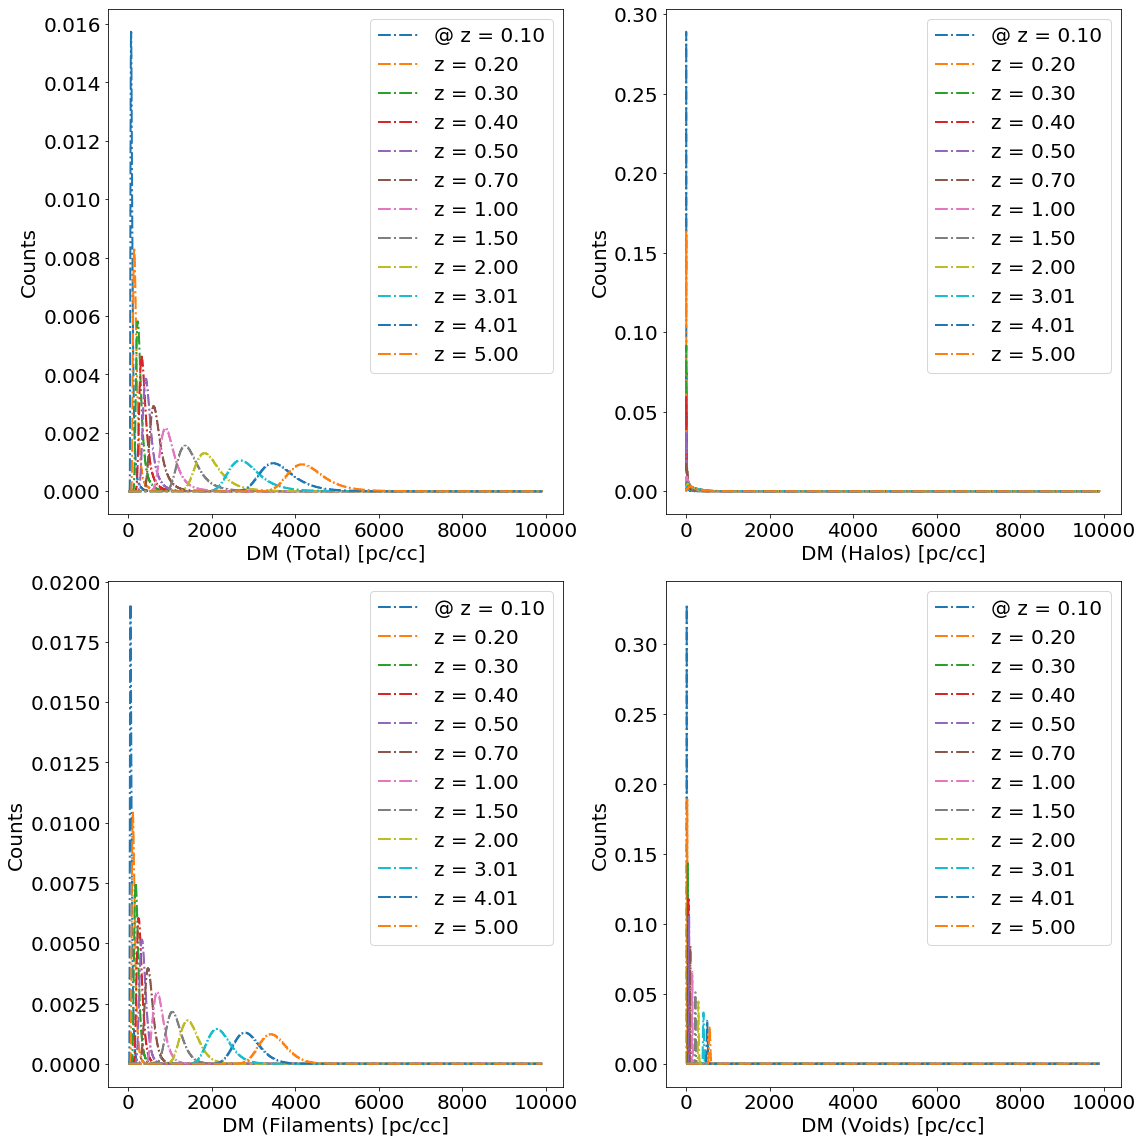

In [128]:
#histogram method from: https://stackoverflow.com/questions/64616617/matplotlib-plot-histogram-given-pre-computed-counts-and-bins

###################
#Initialise figure#
###################

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(221)
ax1.set_xlabel('DM (Total) [pc/cc]',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
#ax1.set_xlim([0,200])
#ax2 = fig.add_subplot(222)
#ax2.set_xlabel('DM (Total) [pc/cc]',fontsize=20)
#ax2.set_ylabel('Counts',fontsize=20)
#ax2.set_xscale('log')
#ax2.set_ylim([0,0.003])
#ax2.set_xlim([4e2,1e4])
#ax2.tick_params(axis='x', labelsize=20)
#ax2.tick_params(axis='y', labelsize=20)

ax3 = fig.add_subplot(222)
ax3.set_xlabel('DM (Halos) [pc/cc]',fontsize=20)
ax3.set_ylabel('Counts',fontsize=20)
#ax3.set_xscale('log')
#ax3.set_yscale('log')
#ax3.set_xlim([0,100])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)

#ax4 = fig.add_subplot(224)
#ax4.set_xlabel('DM (Halos) [pc/cc]',fontsize=20)
#ax4.set_ylabel('Counts',fontsize=20)
#ax4.set_xscale('log')
#ax4.set_yscale('log')
#ax4.tick_params(axis='x', labelsize=20)
#ax4.tick_params(axis='y', labelsize=20)

ax5 = fig.add_subplot(223)
ax5.set_xlabel('DM (Filaments) [pc/cc]',fontsize=20)
ax5.set_ylabel('Counts',fontsize=20)
#ax5.set_xscale('log')
ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)

#ax6 = fig.add_subplot(226)
#ax6.set_xlabel('DM (Filaments) [pc/cc]',fontsize=20)
#ax6.set_ylabel('Counts',fontsize=20)
#ax6.set_xscale('log')
#ax6.tick_params(axis='x', labelsize=20)
#ax6.tick_params(axis='y', labelsize=20)

ax7 = fig.add_subplot(224)
ax7.set_xlabel('DM (Voids) [pc/cc]',fontsize=20)
ax7.set_ylabel('Counts',fontsize=20)
#ax7.set_xscale('log')
ax7.tick_params(axis='x', labelsize=20)
ax7.tick_params(axis='y', labelsize=20)

#ax8 = fig.add_subplot(228)
#ax8.set_xlabel('DM (Voids) [pc/cc]',fontsize=20)
#ax8.set_ylabel('Counts',fontsize=20)
#ax8.set_xscale('log')
#ax8.tick_params(axis='x', labelsize=20)
#ax8.tick_params(axis='y', labelsize=20)

#############
#Plot Totals#
#############

for i in range(len(snap_z_list)):
    #exclude z=0 because the DM is 0
    #print('Redshift: {0} Max DMTNG: {1:.2f}'.format(snap_z_list[i],bin_edges[:-1][np.argmax(counts_Pakmor[i])]))
    
    if i==0:
        pass
    if i==1:
        #print(i,snap_z_list[i])
        ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=1, lw=2,ls='-.',color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        #ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=0.3,lw=6, color='C{0}'.format(i-1),label='Pakmor @ z = {0:.2f}'.format(snap_z_list[i]))
    elif (i>1)&(i<7):
        #print(i,snap_z_list[i])
        ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=1, lw=2,ls='-.',color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=0.3,lw=6, color='C{0}'.format(i-1))
    elif i>=7:
        #print(i,snap_z_list[i])
        ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=1, lw=2,ls='-.',color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax2.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=0.3,lw=6, color='C{0}'.format(i-1))

        #plt.legend(fontsize=15)
    ax1.legend(fontsize=20)
    #ax2.legend(fontsize=20)
    
############
#Plot Halos#
############

for i in range(len(snap_z_list)):
    #exclude z=0 because the DM is 0
    if i==0:
        pass
    if i==1:
        ax3.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post', alpha=1, lw=2,ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))        
        #ax3.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post', alpha=0.3, lw=6, color='C{0}'.format(i-1),label='Pakmor @ z = {0:.2f}'.format(snap_z_list[i]))        
    elif (i>1)&(i<7):
        #print(i,snap_z_list[i])
        ax3.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post', alpha=1, lw=2,ls='-.',color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax3.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post', alpha=0.3, lw=6,color='C{0}'.format(i-1))
    elif i>=7:
        #print(i,snap_z_list[i])
        ax3.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post',  alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax4.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post',  alpha=0.3, lw=6, color='C{0}'.format(i-1))

    ax3.legend(fontsize=20)
    #ax4.legend(fontsize=20)
    
################
#Plot Filaments#
################

for i in range(len(snap_z_list)):
    #exclude z=0 because the DM is 0
    if i==0:
        pass
    elif i==1:
        ax5.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        #ax5.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', alpha=0.3, lw=6, color='C{0}'.format(i-1),label='Pakmor @ z = {0:.2f}'.format(snap_z_list[i]))
    elif (i>1)&(i<7):
        #print(i,snap_z_list[i])
        ax5.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', ls='-.',lw=2, alpha=1, color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax5.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post',lw=6, alpha=0.3, color='C{0}'.format(i-1))
    elif i>=7:
        #print(i,snap_z_list[i])
        ax5.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', ls='-.',lw=2, alpha=1, color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax6.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', lw=6, alpha=0.3, color='C{0}'.format(i-1))
        
    ax5.legend(fontsize=20)
    #ax6.legend(fontsize=20)

############
#Plot Voids#
############

for i in range(len(snap_z_list)):
    #exclude z=0 because the DM is 0
    if i==0:
        pass
    elif i==1:
        ax7.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        #ax7.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=0.3, lw=6, color='C{0}'.format(i-1),label='Pakmor @ z = {0:.2f}'.format(snap_z_list[i]))
    elif (i>1)&(i<7):
        #print(i,snap_z_list[i])
        ax7.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax7.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=0.3, lw=6, color='C{0}'.format(i-1))
    elif i>=7:
        #print(i,snap_z_list[i])
        ax7.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='z = {0:.2f}'.format(snap_z_list[i]))
        #ax8.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=0.3, lw=6, color='C{0}'.format(i-1))
    ax7.legend(fontsize=20)
    #ax8.legend(fontsize=20)

plt.tight_layout()
#print('Saving LSS_Analysis_Hists_{0}_Fach.png'.format(sim_to_load))
#plt.savefig('LSS_Analysis_Hists_{0}_Fach.png'.format(sim_to_load),format='png')
plt.show()

# Fits

## Fitting the void histograms

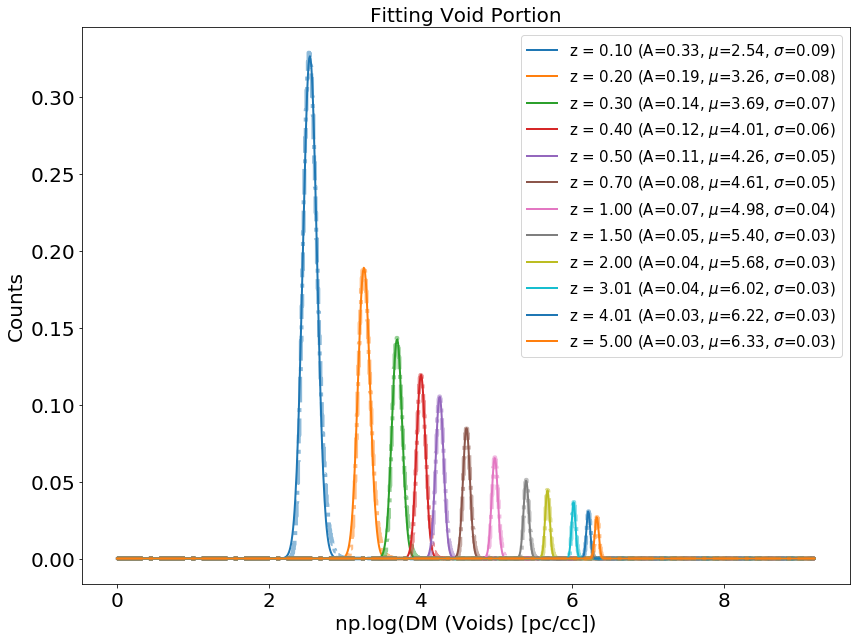

In [129]:
#initialise figure
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Void Portion',fontsize=20)
ax1.set_xlabel('np.log(DM (Voids) [pc/cc])',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
#ax1.set_xscale('log')
#ax1.set_xlim([0,1000])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
    #x=bin_edges[:-1] #x values of histograms (log to preserve gaussian shape)
    #y=Hal_counts_Pakmor[i] #halo portion
    #y=Fil_counts_Pakmor[i] #filament portion
    y=Voi_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        stddev=1
        
        #####################
        #Perform the fitting#
        #####################
        
        g_init = models.Gaussian1D(amplitude=amp, mean=mean, stddev=stddev)
        #g_init = my_norm(loc=mean, scale=0.1)

        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, x, y)
        
        ##############
        #plot the fit#
        ##############
        
        #ax1.bar(x=x,height=y,width=np.diff(np.log(bin_edges)), align='edge', alpha=0.5, ec='black',color='C{0}'.format(i-1))
        ax1.step(x=np.log(bin_edges[:-1]), y=Voi_counts_Pakmor[i], where='post', alpha=0.5, lw=4, ls='-.', color='C{0}'.format(i-1))
        ax1.plot(x, g(x), color='C{0}'.format(i-1),lw=2,label='z = {0:.2f} (A={1:.2f}, $\mu$={2:.2f}, $\sigma$={3:.2f})'.format(snap_z_list[i],g.amplitude.value,g.mean.value,g.stddev.value))
        #ax1.plot(x, g(x), color='C{0}'.format(i-1),lw=2,label='z = {0:.2f} ($\mu$={1:.2f}, $\sigma$={2:.2f})'.format(snap_z_list[i],g.loc.value,g.scale.value))

        
        plt.legend(fontsize=15)
        
plt.tight_layout()
plt.savefig('LSS_Fits_Void_Gaussian.png',format='png')

### Make a posh version of the plot

<Figure size 432x288 with 0 Axes>

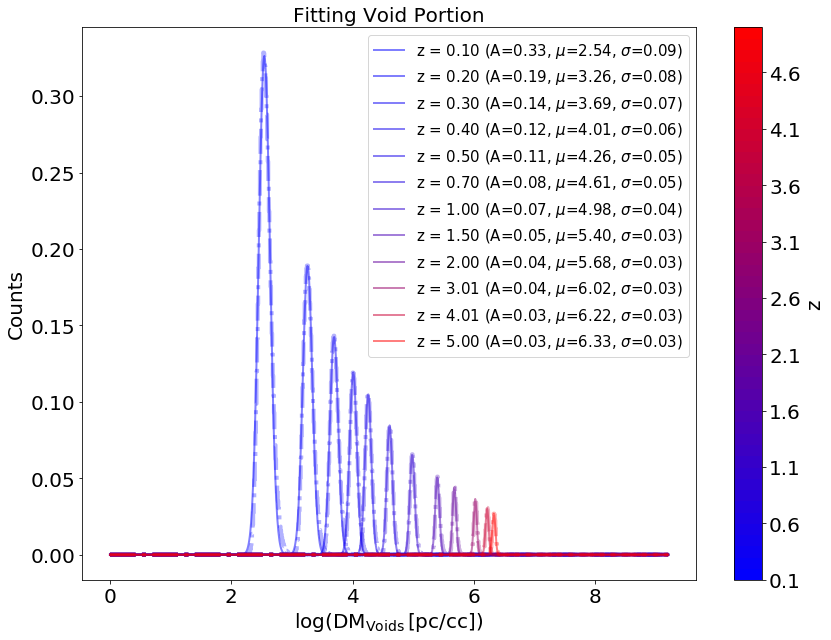

In [130]:
#Initialise arrays to store fitting parameters
Void_fit_amp = []
Void_fit_mean = []
Void_fit_stddev = []

#########################
#colorbar initialisation#
#########################

#Note: from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

redshift_range = np.round(snap_z_list,1) #original range of redshifts rounded to nearest 1dp
redshift_range_new = np.array(redshift_range[1:]) #drop snap 99 (z=0) as we won't plot it
redshift_to_level = (redshift_range_new*10).astype(int) #levels which define colors must be integers
min_level = redshift_to_level[0] #color of min redshift
max_level = redshift_to_level[-1] #color of max redshift
step=1 #redshift step

#set up simple transition color map
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

#Create throwaway figure with contourf to provide colorbar info, then clear
Z = [[0,0],[0,0]]
levels = range(min_level,max_level+step,step)
CS3 = plt.contourf(Z, np.array(levels)/10, cmap=mymap) #note: divide by 10 here to get back to true redshifts
plt.clf()

###################
#initialise figure#
###################

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Void Portion',fontsize=20)
ax1.set_xlabel(r'$\rm{log(DM_{Voids}\,[pc/cc]}$)',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
    y=Voi_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        stddev=1
        
        #####################
        #Perform the fitting#
        #####################
        
        g_init = models.Gaussian1D(amplitude=amp, mean=mean, stddev=stddev)
        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, x, y)
        
        #store results to arrays#
        Void_fit_amp.append(g.amplitude.value)
        Void_fit_mean.append(g.mean.value)
        Void_fit_stddev.append(g.stddev.value)
        
        ###################################
        #get the color of the line to plot#
        ###################################
        
        #set rgb color based on redshift normalised to my range
        r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
        gr = 0
        b = 1-r
        #print((r,gr,b))
        #print(x,g(x))
        
        ##############
        #plot the fit#
        ##############
        
        ax1.step(x=np.log(bin_edges[:-1]), y=Voi_counts_Pakmor[i], where='post', alpha=0.3, lw=4, ls='-.', color=(r,gr,b))
        ax1.plot(x, g(x), color=(r,gr,b),alpha=0.5,lw=2,label='z = {0:.2f} (A={1:.2f}, $\mu$={2:.2f}, $\sigma$={3:.2f})'.format(snap_z_list[i],g.amplitude.value,g.mean.value,g.stddev.value))
        
        plt.legend(fontsize=15)
        
#####################
#adjust the colorbar#
#####################

cbar = plt.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label('z',fontsize=20) #change colorbar font size

plt.tight_layout()
plt.savefig('LSS_Fits_Void_Gaussian.png',format='png')

## Fitting the filaments histogram

1 3.8906542912652142 0.019059227510467975
2 4.655877765613586 0.010422860813337905
3 5.144514442004715 0.007458275584413508
4 5.4856381594853145 0.006036212190455355
5 5.771444517374465 0.00515291170293564
6 6.149446474582696 0.003966422666212003
7 6.536667991722837 0.002969630727561878
8 6.942328628726792 0.0021504240448888736
9 7.255793666411668 0.0018017646979435783
10 7.6522347434837155 0.0014474226241623148
11 7.928821541440958 0.0012992478344795119
12 8.131651859942936 0.0012289434713655448


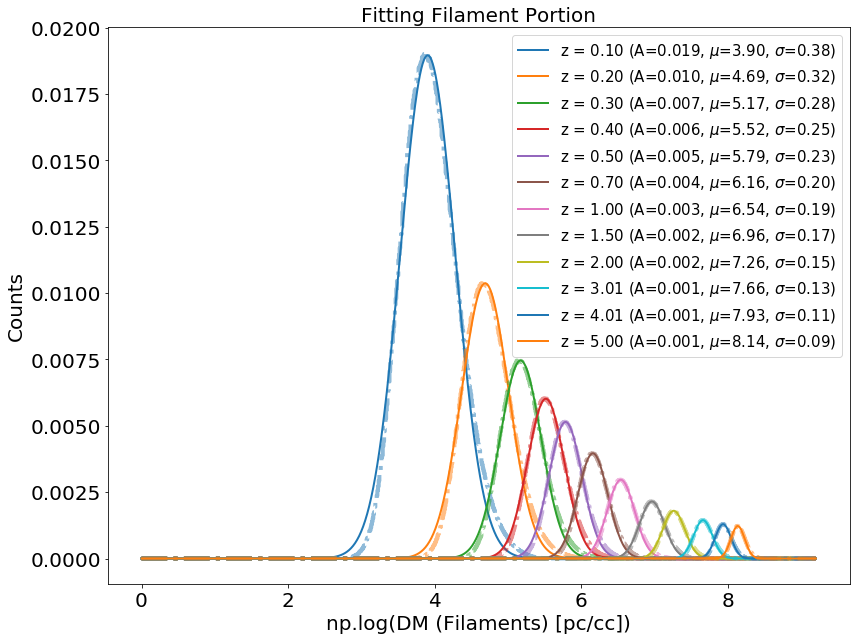

In [131]:
#initialise figure
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Filament Portion',fontsize=20)
ax1.set_xlabel('np.log(DM (Filaments) [pc/cc])',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
    #x=bin_edges[:-1] #x values of histograms
    #y=Hal_counts_Pakmor[i] #halo portion
    y=Fil_counts_Pakmor[i] #filament portion
    #y=Voi_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        print(i,mean,amp)
        stddev=1
        
        #####################
        #Perform the fitting#
        #####################
        
        g_init = models.Gaussian1D(amplitude=amp, mean=mean, stddev=stddev)
        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, x, y)
        
        ##############
        #plot the fit#
        ##############
        
        #ax1.scatter(x,y)
        #ax1.bar(x=x,height=y,width=np.diff(np.log(bin_edges)), align='edge', alpha=0.5, ec='black',color='C{0}'.format(i-1))
        ax1.step(x=np.log(bin_edges[:-1]), y=Fil_counts_Pakmor[i], where='post', ls='-.',lw=4, alpha=0.5, color='C{0}'.format(i-1))

        ax1.plot(x, g(x), color='C{0}'.format(i-1),lw=2,label='z = {0:.2f} (A={1:.3f}, $\mu$={2:.2f}, $\sigma$={3:.2f})'.format(snap_z_list[i],g.amplitude.value,g.mean.value,g.stddev.value))
        
        plt.legend(fontsize=15)
        
plt.tight_layout()
plt.savefig('LSS_Fits_Filament_Gaussian.png',format='png')

### Make a posh version of the plot

<Figure size 432x288 with 0 Axes>

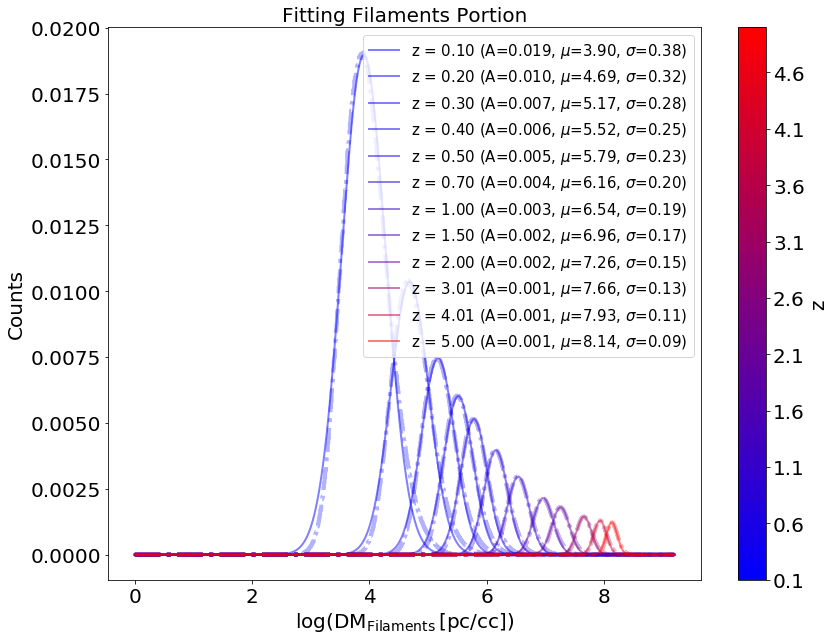

In [132]:
#Initialise arrays to store fitting parameters
Fila_fit_amp = []
Fila_fit_mean = []
Fila_fit_stddev = []

#########################
#colorbar initialisation#
#########################

#Note: from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

redshift_range = np.round(snap_z_list,1) #original range of redshifts rounded to nearest 1dp
redshift_range_new = np.array(redshift_range[1:]) #drop snap 99 (z=0) as we won't plot it
redshift_to_level = (redshift_range_new*10).astype(int) #levels which define colors must be integers
min_level = redshift_to_level[0] #color of min redshift
max_level = redshift_to_level[-1] #color of max redshift
step=1 #redshift step

#set up simple transition color map
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

#Create throwaway figure with contourf to provide colorbar info, then clear
Z = [[0,0],[0,0]]
levels = range(min_level,max_level+step,step)
CS3 = plt.contourf(Z, np.array(levels)/10, cmap=mymap) #note: divide by 10 here to get back to true redshifts
plt.clf()

###################
#initialise figure#
###################

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Filaments Portion',fontsize=20)
ax1.set_xlabel(r'$\rm{log(DM_{Filaments}\,[pc/cc]}$)',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
    y=Fil_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        stddev=1
        
        #####################
        #Perform the fitting#
        #####################
        
        g_init = models.Gaussian1D(amplitude=amp, mean=mean, stddev=stddev)
        fit_g = fitting.LevMarLSQFitter()
        g = fit_g(g_init, x, y)
        
        #store results to arrays#
        Fila_fit_amp.append(g.amplitude.value)
        Fila_fit_mean.append(g.mean.value)
        Fila_fit_stddev.append(g.stddev.value)
        
        ###################################
        #get the color of the line to plot#
        ###################################
        
        #set rgb color based on redshift normalised to my range
        r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
        gr = 0
        b = 1-r
        #print((r,gr,b))
        #print(x,g(x))
        
        ##############
        #plot the fit#
        ##############
        
        ax1.step(x=np.log(bin_edges[:-1]), y=Fil_counts_Pakmor[i], where='post', alpha=0.3, lw=4, ls='-.', color=(r,gr,b))
        ax1.plot(x, g(x), color=(r,gr,b),alpha=0.5,lw=2,label='z = {0:.2f} (A={1:.3f}, $\mu$={2:.2f}, $\sigma$={3:.2f})'.format(snap_z_list[i],g.amplitude.value,g.mean.value,g.stddev.value))
        
        plt.legend(fontsize=15)
        
#####################
#adjust the colorbar#
#####################

cbar = plt.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label('z',fontsize=20) #change colorbar font size

plt.tight_layout()
plt.savefig('LSS_Fits_Filaments_Gaussian.png',format='png')

## Fitting the halos portion

Fit options: https://www.spcforexcel.com/knowledge/basic-statistics/deciding-which-distribution-fits-your-data-best
Defining models: https://docs.astropy.org/en/stable/modeling/new-model.html 

Note: the above will also be useful for combining each structure...

perhaps Smallest Extreme Value distribution? (AKA the Gumbel distribution? (see below): https://www.itl.nist.gov/div898/handbook/eda/section3/eda366g.htm

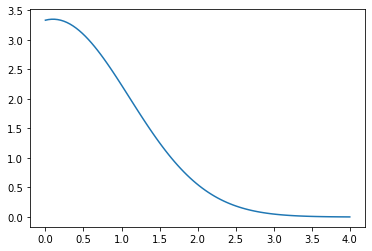

In [133]:
@custom_model
def scipy_skew(x,amp=0.4,a=4,loc=4,scale=1):
    return amp*skewnorm.pdf(x,a,loc,scale)

@custom_model
def scipy_gumbel(x,amp=0.4,loc=0,scale=1):
    """
    Model of the Gumbel (minimum) distribution for fitting with astropy.
    Defining my own model is based on: https://docs.astropy.org/en/stable/modeling/new-model.html
    Distribution idea from: https://docs.astropy.org/en/stable/modeling/new-model.html
    Distribution from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_l.html
    
    """
    
    return amp*gumbel_l.pdf(x,loc,scale)

@custom_model
def scipy_norm(x,amp=1,loc=0,scale=1):
    return amp*norm.pdf(x,loc,scale)

@custom_model
def my_norm(x,amp=1,loc=0,scale=1):
    """
    Not normalised (amp != norm factor)
    """
    return (amp * np.exp(-0.5 * ((x-loc)/(scale))**2))

def my_norm_test(x,amp=1,loc=0,scale=1):
    """
    Not normalised (amp != norm factor)
    """
    return (amp * np.exp(-0.5 * ((x-loc)/(scale))**2))


#plt.plot(np.linspace(0,1,100),norm.pdf(np.linspace(0,1,100),3.35,1.58))
plt.plot(np.linspace(0,4,100),my_norm_test(np.linspace(0,4,100),3.35,0.1))


1 0.03687823972763244 0.2888776439411518


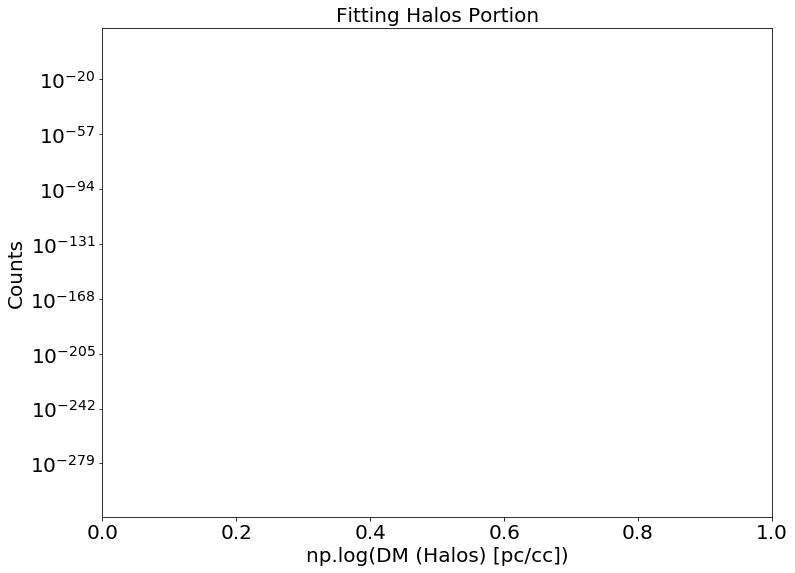

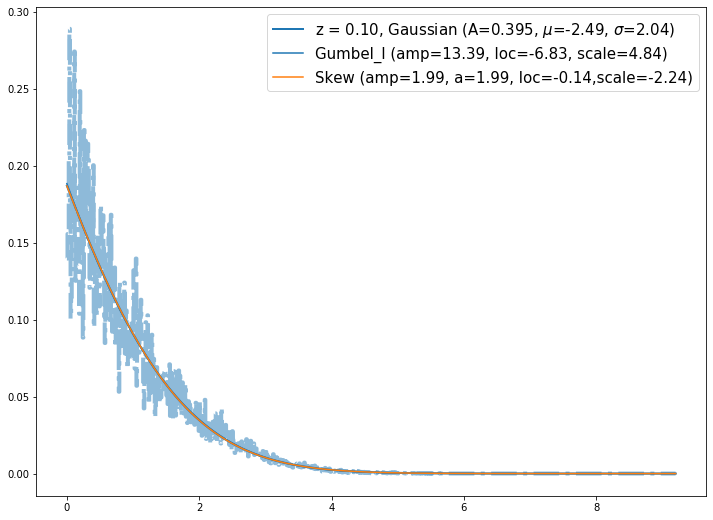

Parameter('loc', value=-2.491657994441862) Parameter('scale', value=2.0354100454373345)
2 0.04609779965954039 0.1632832291713316


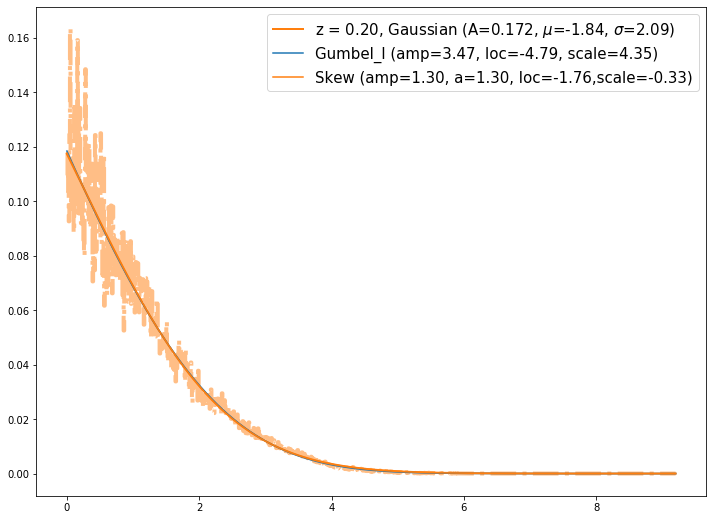

Parameter('loc', value=-1.835176371873722) Parameter('scale', value=2.092248358896335)
3 0.28580635788915076 0.09157240422530227


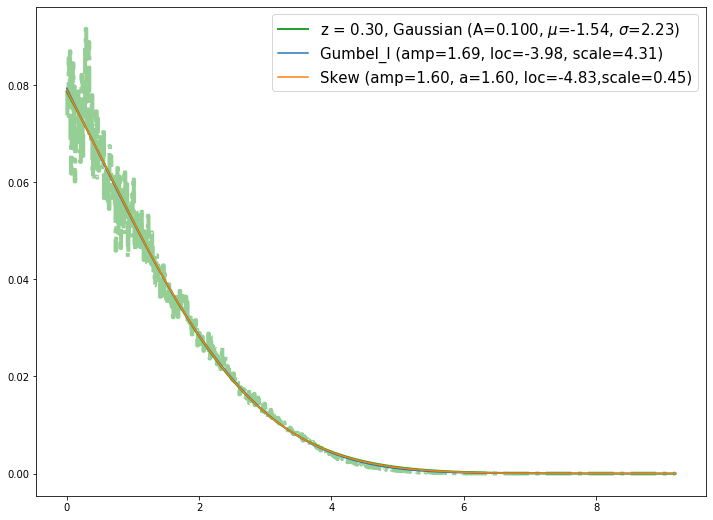

Parameter('loc', value=-1.5352282412613587) Parameter('scale', value=2.2263391240187382)
4 0.04609779965954039 0.05995435734952508


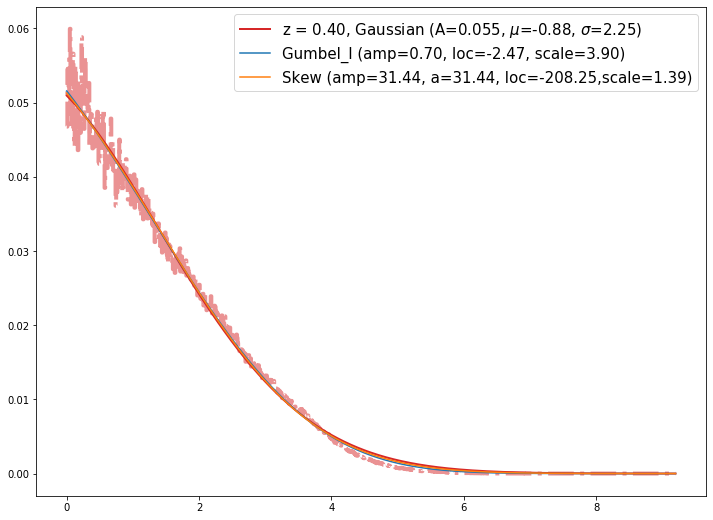

Parameter('loc', value=-0.8821827086997794) Parameter('scale', value=2.2483732197029083)
5 0.27658679795724267 0.03673386410899421


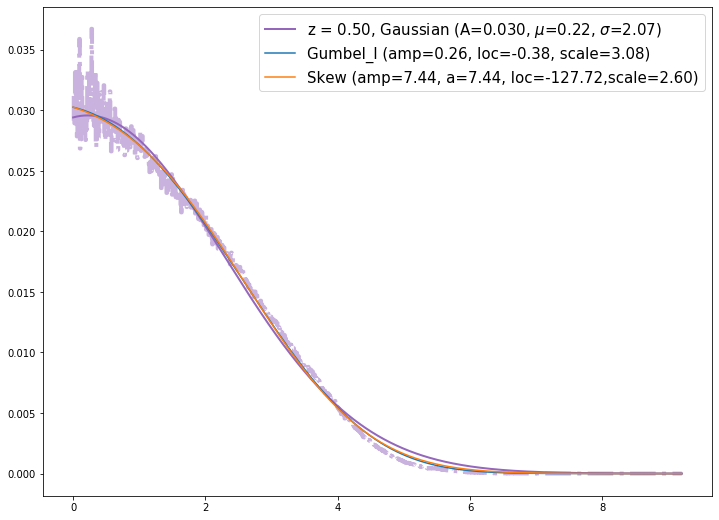

Parameter('loc', value=0.21949190705754548) Parameter('scale', value=2.068404336764998)
6 0.27658679795724267 0.017500287859153564


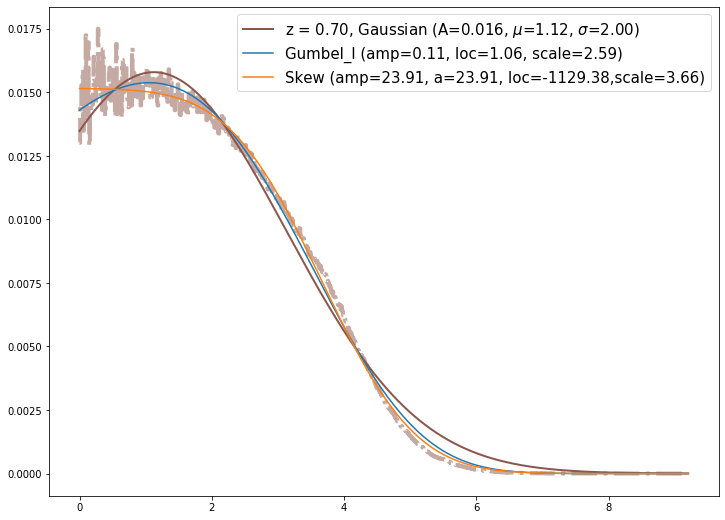

Parameter('loc', value=1.1243028713840348) Parameter('scale', value=1.996751968596602)
7 1.9637662654964234 0.009274495572626567


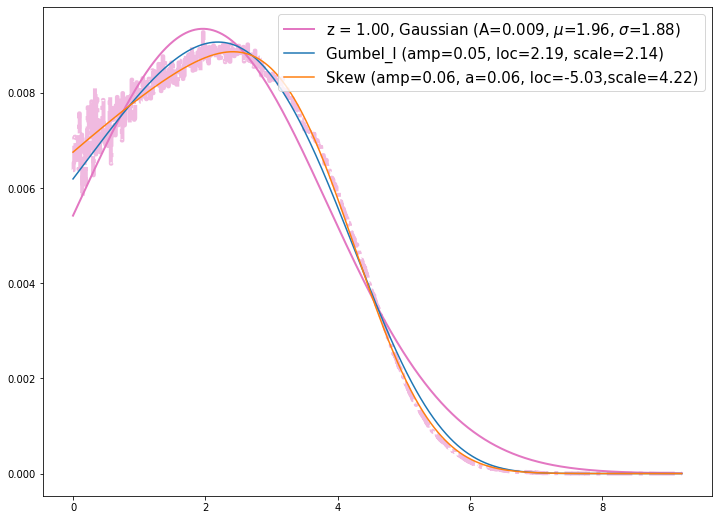

Parameter('loc', value=1.962884332975666) Parameter('scale', value=1.880322537375023)
8 3.1991872963721075 0.005768541354085975


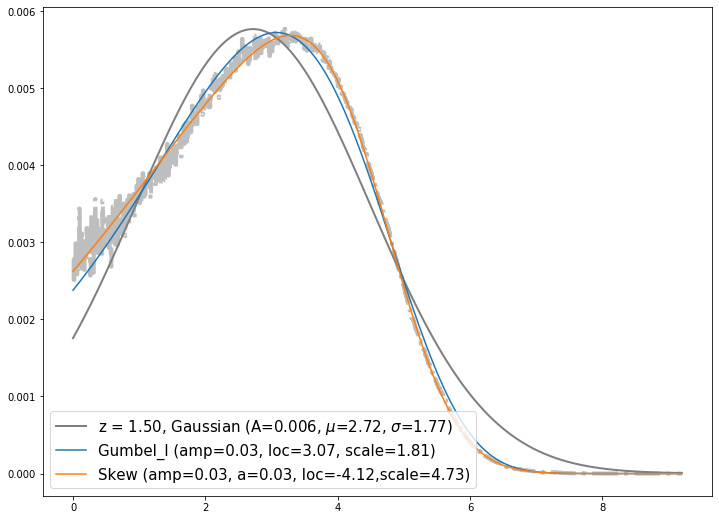

Parameter('loc', value=2.721996302069089) Parameter('scale', value=1.765539009780746)
9 3.8814347313333064 0.004437614353820975


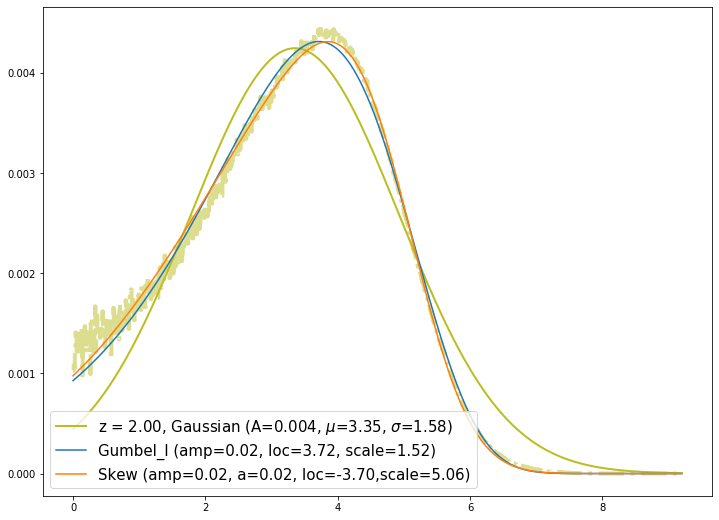

Parameter('loc', value=3.3547777342277127) Parameter('scale', value=1.5789886703049283)
10 4.194899769018181 0.00335683476992314


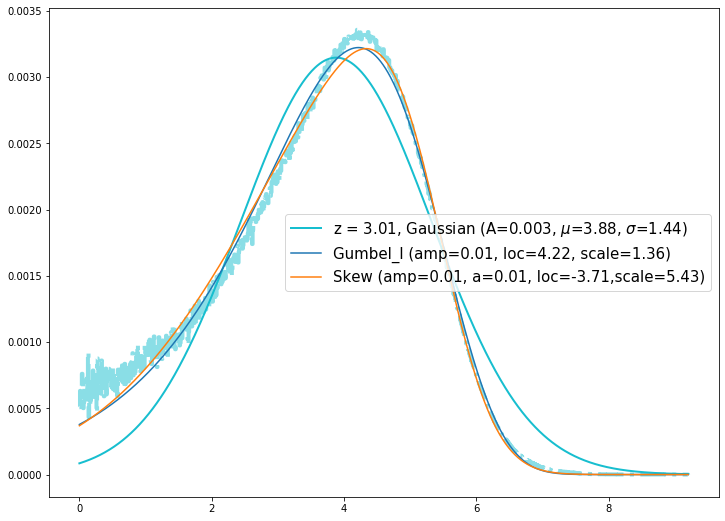

Parameter('loc', value=3.88080853012236) Parameter('scale', value=1.443538627331074)
11 4.462267007043516 0.002948694885977973


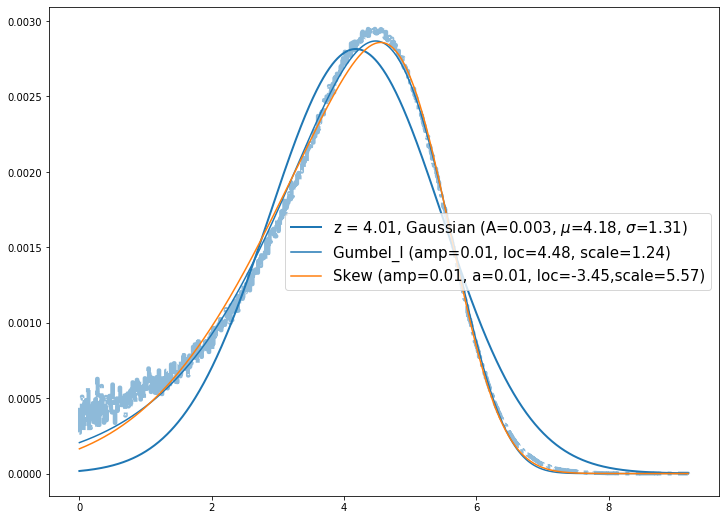

Parameter('loc', value=4.177146130503841) Parameter('scale', value=1.306675579721385)
12 4.628219085817862 0.002842140490583683


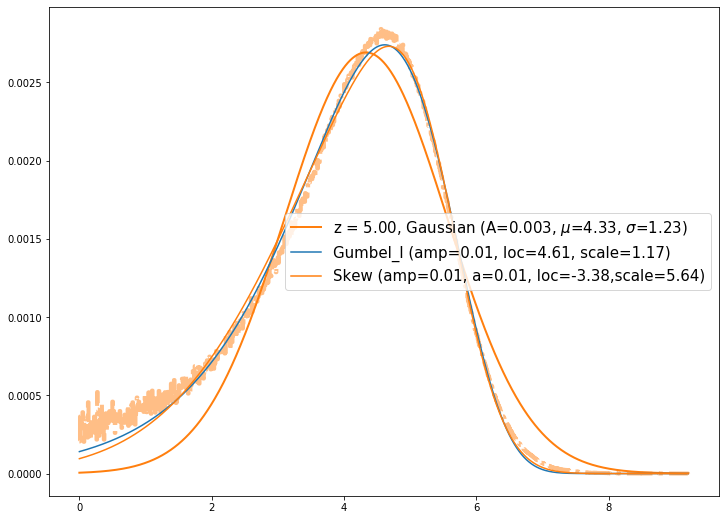

Parameter('loc', value=4.331488128910633) Parameter('scale', value=1.2297861330714481)


<Figure size 432x288 with 0 Axes>

In [163]:
#initialise figure
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Halos Portion',fontsize=20)
ax1.set_xlabel('np.log(DM (Halos) [pc/cc])',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.set_yscale('log')
#ax1.set_ylim([1e-4,1e2])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
        
    #x=bin_edges[:-1] #x values of histograms
    y=Hal_counts_Pakmor[i] #halo portion
    #y=Fil_counts_Pakmor[i] #filament portion
    #y=Voi_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        print(i,mean,amp)
        stddev=1
        
        
        mu=0 #gumbel location parameter
        beta=1 #gumbel scale parameter
        
        #####################
        #Perform the fitting#
        #####################
        
        gaussian_init = models.Gaussian1D(amplitude=amp, mean=mean, stddev=stddev)
        #gumbel_r_init = gumbel_r_pdf(loc=0,scale=1)
        #skew_init = skew(a=3,loc=mean,scale=1)
        scipy_norm_init=scipy_norm(amp=0.4,loc=3.35,scale=1.58)
        scipy_gumbel_init=scipy_gumbel(amp=1,loc=3.35,scale=1.58)
        scipy_skew_init=scipy_skew(amp=0.4,a=1,loc=3.35,scale=1.58)


        fit_g = fitting.LevMarLSQFitter()
        
        gaussian = fit_g(gaussian_init, x, y)
        scipynorm = fit_g(scipy_norm_init,x,y)
        scipygumbel = fit_g(scipy_gumbel_init,x,y)
        scipyskew = fit_g(scipy_skew_init,x,y)
        
        
        
        
        ##############
        #plot the fit#
        ##############
        
        fig = plt.figure(figsize=(12,9))
        ax1 = fig.add_subplot(111)
        
        #ax1.scatter(x,y)
        #ax1.bar(x=x,height=y,width=np.diff(np.log(bin_edges)), align='edge', alpha=0.5, ec='black',color='C{0}'.format(i-1))
        ax1.step(x=np.log(bin_edges[:-1]), y=Hal_counts_Pakmor[i], where='post', ls='-.',lw=4, alpha=0.5, color='C{0}'.format(i-1))
        ax1.plot(x, gaussian(x), color='C{0}'.format(i-1),lw=2,label='z = {0:.2f}, Gaussian (A={1:.3f}, $\mu$={2:.2f}, $\sigma$={3:.2f})'.format(snap_z_list[i],gaussian.amplitude.value,gaussian.mean.value,gaussian.stddev.value))
        ax1.plot(x, scipygumbel(x),label='Gumbel_l (amp={0:.2f}, loc={1:.2f}, scale={2:.2f})'.format(scipygumbel.amp.value,scipygumbel.loc.value,scipygumbel.scale.value))
        ax1.plot(x, scipyskew(x),label='Skew (amp={0:.2f}, a={0:.2f}, loc={1:.2f},scale={2:.2f})'.format(scipyskew.amp.value,scipyskew.a.value,scipyskew.loc.value,scipyskew.scale.value))

        plt.legend(fontsize=15)
        plt.show()
        
        print(scipynorm.loc,scipynorm.scale)
        
plt.tight_layout()
plt.savefig('LSS_Fits_Filament_Gaussian.png',format='png')

### Make a posh version of the plot

<Figure size 432x288 with 0 Axes>

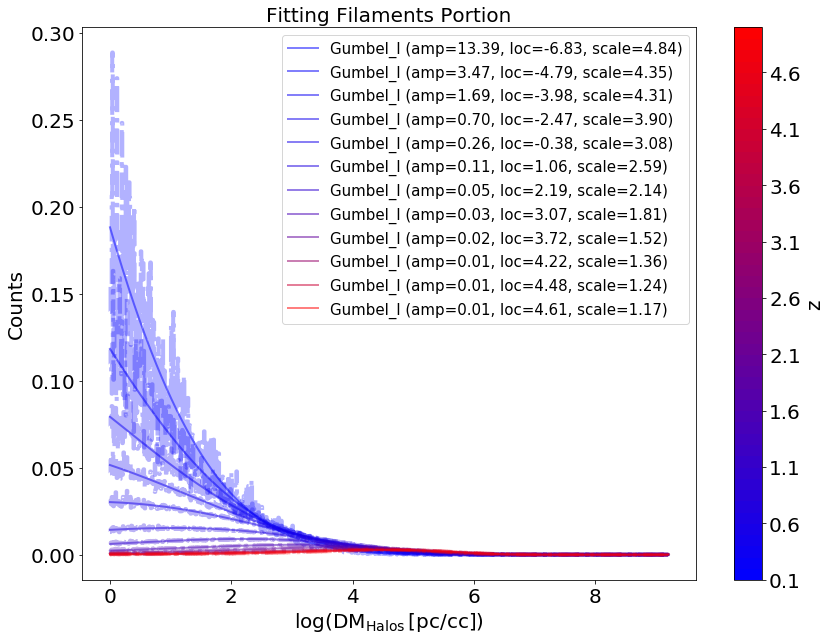

In [135]:
#Initialise arrays to store fitting parameters
Halo_fit_amp = []
Halo_fit_loc = []
Halo_fit_scale = []

#########################
#colorbar initialisation#
#########################

#Note: from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

redshift_range = np.round(snap_z_list,1) #original range of redshifts rounded to nearest 1dp
redshift_range_new = np.array(redshift_range[1:]) #drop snap 99 (z=0) as we won't plot it
redshift_to_level = (redshift_range_new*10).astype(int) #levels which define colors must be integers
min_level = redshift_to_level[0] #color of min redshift
max_level = redshift_to_level[-1] #color of max redshift
step=1 #redshift step

#set up simple transition color map
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

#Create throwaway figure with contourf to provide colorbar info, then clear
Z = [[0,0],[0,0]]
levels = range(min_level,max_level+step,step)
CS3 = plt.contourf(Z, np.array(levels)/10, cmap=mymap) #note: divide by 10 here to get back to true redshifts
plt.clf()

###################
#initialise figure#
###################

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Fitting Filaments Portion',fontsize=20)
ax1.set_xlabel(r'$\rm{log(DM_{Halos}\,[pc/cc]}$)',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

#ax1.set_yscale('log')
#ax1.set_xlim([0,5])


for i in range(len(snap_z_list)): #loop over redshifts
    
    #####################
    #extract data to fit#
    #####################
    
    x=np.log(bin_edges[:-1]) #x values of histograms (log to preserve gaussian shape)
    y=Hal_counts_Pakmor[i] #void portions
    

    ######################################
    #only fit for snapshot 91 and onwards#
    ######################################
    
    if i>=1:
        
        ###########################################
        #guess initial parameters for gaussian fit#
        ###########################################
        
        amp = y[np.argmax(y)] #guess amplitude of curve: height of largest bin
        mean = x[np.argmax(y)] #guess mean: DM of largest bin
        stddev=1
        
        #####################
        #Perform the fitting#
        #####################
        
        scipy_gumbel_init=scipy_gumbel(amp=0.4,loc=3.35,scale=1.58)
        fit_g = fitting.LevMarLSQFitter()
        scipygumbel = fit_g(scipy_gumbel_init,x,y)
        
        #store results to arrays#
        Halo_fit_amp.append(scipygumbel.amp.value)
        Halo_fit_loc.append(scipygumbel.loc.value)
        Halo_fit_scale.append(scipygumbel.scale.value)
        
        ###################################
        #get the color of the line to plot#
        ###################################
        
        #set rgb color based on redshift normalised to my range
        r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
        gr = 0
        b = 1-r
        #print((r,gr,b))
        #print(x,g(x))
        
        ##############
        #plot the fit#
        ##############
        
        ax1.step(x=np.log(bin_edges[:-1]), y=Hal_counts_Pakmor[i], where='post', alpha=0.3, lw=4, ls='-.', color=(r,gr,b))
        ax1.plot(x, scipygumbel(x), color=(r,gr,b),alpha=0.5,lw=2,label='Gumbel_l (amp={0:.2f}, loc={1:.2f}, scale={2:.2f})'.format(scipygumbel.amp.value,scipygumbel.loc.value,scipygumbel.scale.value))
        
        plt.legend(fontsize=15)
        
#####################
#adjust the colorbar#
#####################

cbar = plt.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label('z',fontsize=20) #change colorbar font size

plt.tight_layout()
plt.savefig('LSS_Fits_Halos_Gumbel.png',format='png')

# Convolve the fits

In [2]:

fig=plt.figure(figsize=(16,16))

ax1=fig.add_subplot(221)
ax1.set_xlabel('Convolved result',fontsize=20)
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2=fig.add_subplot(222)
ax2.set_xlabel('np.log(DM (Halos) [pc/cc])',fontsize=20)
#ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3=fig.add_subplot(223)
ax3.set_xlabel('np.log(DM (Filaments) [pc/cc])',fontsize=20)
#ax3.set_xscale('log')
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)

ax4=fig.add_subplot(224)
ax4.set_xlabel('np.log(DM (Voids) [pc/cc])',fontsize=20)
#ax4.set_xscale('log')
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)


for i in range(len(snap_z_list)): #loop over each fitted snapshot
    
    if i==0: #skip redshift 0 unfitted snapshot
        pass
    
    else:
    
        print('i={0}, Redshift: {1:.2f}'.format(i,snap_z_list[i]))

        #print the fitting parameters
        print('Halo fit params: amp={0:.2f}, loc={1:.2f}, scale={2:.2f}'.format(Halo_fit_amp[i-1],
                                                                                Halo_fit_loc[i-1],
                                                                                Halo_fit_scale[i-1]))

        print('Filament fit params: amp={0:.3f}, mean={1:.2f}, stddev={2:.2f}'.format(Fila_fit_amp[i-1],
                                                                                      Fila_fit_mean[i-1],
                                                                                      Fila_fit_stddev[i-1]))

        print('Void fit params: amp={0:.2f}, mean={1:.2f}, stddev={2:.2f}'.format(Void_fit_amp[i-1],
                                                                                  Void_fit_mean[i-1],
                                                                                  Void_fit_stddev[i-1]))

        ##############################
        #create the curves to combine#
        ##############################
        
        x=np.linspace(0,10,1000)

        #Halo_fit_y = Halo_fit_amp[i-1]*gumbel_l.pdf(x,loc=Halo_fit_loc[i-1],scale=Halo_fit_scale[i-1])
        Halo_fit_y = scipy_gumbel(amp=Halo_fit_amp[i-1],loc=Halo_fit_loc[i-1],scale=Halo_fit_scale[i-1])(x)

        Fila_fit_y = models.Gaussian1D(amplitude=Fila_fit_amp[i-1],mean=Fila_fit_mean[i-1],stddev=Fila_fit_stddev[i-1])(x)
        Void_fit_y = models.Gaussian1D(amplitude=Void_fit_amp[i-1],mean=Void_fit_mean[i-1],stddev=Void_fit_stddev[i-1])(x)

        ##################
        #do the combining#
        ##################
        
        #Combine through convolution
        Combined_c = convolve(Halo_fit_y,Fila_fit_y) #combine first two curves
        Combined_c = convolve(Combined_c,Void_fit_y) #combine final curve

        #Combine through multiplication
        Combined_m = Void_fit_y*Halo_fit_y*Fila_fit_y

        #Combine through addition
        Combined_a = Void_fit_y+Halo_fit_y+Fila_fit_y
        
        #################
        #do the plotting#
        #################
        
        ax1.plot(np.exp(Combined_c),color='C{0}'.format(i-1))

        ax2.plot(x,Halo_fit_y,color='C{0}'.format(i-1))
        ax2.step(x=np.log(bin_edges[:-1]), y=Hal_counts_Pakmor[i],alpha=0.3,lw=4,color='C{0}'.format(i-1))



        ax3.plot(x,Fila_fit_y,color='C{0}'.format(i-1))
        ax3.step(x=np.log(bin_edges[:-1]), y=Fil_counts_Pakmor[i],alpha=0.3,lw=4,color='C{0}'.format(i-1))

        ax4.plot(x,Void_fit_y,color='C{0}'.format(i-1))
        ax4.step(x=np.log(bin_edges[:-1]), y=Voi_counts_Pakmor[i],alpha=0.3,lw=4,color='C{0}'.format(i-1))

    

plt.tight_layout()
plt.show()
    
    

NameError: name 'plt' is not defined

# Draw from fits, sum, histogram results

## Define custom distributions from each fit

 Note: Example is from: https://towardsdatascience.com/random-sampling-with-scipy-and-numpy-part-iii-8daa212ce554


In [137]:
#################################
#define custom halo distribution#
#################################

class Halo_Custom_Dist(stats.rv_continuous):
    
    #define init with variable parameters
    def __init__(self, amp, loc, scale, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #init our parameters
        self.amp = amp
        self.loc = loc
        self.scale = scale
        #init our cdf and ppf functions
        self.df_func,self.ppf_func = self.create_cdf_ppf()
        
    #function to return the Halo distribution
    def norm_hal(self,x,amp,loc,scale):
        
        #using astropy
        eqn = scipy_gumbel(amp=amp,
                           loc=loc,
                           scale=scale)(x)
                
        #note: it must return P(DM)=zero for DMs below zero
        #so modify by a function which is 1 for 0 and positive,
        #and zero for negative values. See:
        #https://math.stackexchange.com/questions/1403746/function-that-returns-0-for-all-negative-values
        
        eqn*=(0**(np.sqrt(x**2)-x))
        
        
        return eqn
    
    #function to normalise the pdf over the chosen domain
    def normalisation(self, x):
        return simps(self.pdf(x), x)
    
    #function to...
    def create_cdf_ppf(self):
        # define domain as +/-25 sigma
        xs = np.linspace(-25, 25, 10000001)
        # normalise our pdf to sum to 1 so it satisfies a distribution
        norm_constant = self.normalisation(xs)
        # compute pdfs to be summed to form cdf
        my_pdfs = self.pdf(xs) / norm_constant
        # cumsum to form cdf
        my_cdf = np.cumsum(my_pdfs)
        # make sure cdf bounded on [0,1]
        my_cdf = my_cdf / my_cdf[-1]
        # create cdf and ppf
        func_cdf = interp1d(xs, my_cdf)
        func_ppf = interp1d(my_cdf, xs, fill_value='extrapolate')
        return func_cdf, func_ppf
    
    def _pdf(self,x):
        return self.norm_hal(x,amp=self.amp,loc=self.loc,scale=self.scale)
    
    # cdf function
    def _cdf(self, x):
        return self.cdf_func(x)
    
    # inverse cdf function
    def _ppf(self, x):
        return self.ppf_func(x)

In [138]:

#####################################
#define custom filament distribution#
#####################################

class Filament_Custom_Dist(stats.rv_continuous):
    
    #define init with variable parameters
    def __init__(self, amp, mean, sigma, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #init our parameters
        self.amp = amp
        self.mean = mean
        self.sigma = sigma
        #init our cdf and ppf functions
        self.df_func,self.ppf_func = self.create_cdf_ppf()
        
    #function to return the Filament distribution
    def norm_fil(self,x,amp,mean,sigma):
        
        #gumbel function using astropy
        eqn = models.Gaussian1D(amplitude=amp,
                                mean=mean,
                                stddev=sigma)(x)
        
        
        return eqn
    
    #function to normalise the pdf over the chosen domain
    def normalisation(self, x):
        return simps(self.pdf(x), x)
    
    #function to...
    def create_cdf_ppf(self):
        # define domain as +/-25 sigma
        xs = np.linspace(-25, 25, 10000001)
        # normalise our pdf to sum to 1 so it satisfies a distribution
        norm_constant = self.normalisation(xs)
        # compute pdfs to be summed to form cdf
        my_pdfs = self.pdf(xs) / norm_constant
        # cumsum to form cdf
        my_cdf = np.cumsum(my_pdfs)
        # make sure cdf bounded on [0,1]
        my_cdf = my_cdf / my_cdf[-1]
        # create cdf and ppf
        func_cdf = interp1d(xs, my_cdf)
        func_ppf = interp1d(my_cdf, xs, fill_value='extrapolate')
        return func_cdf, func_ppf
    
    def _pdf(self,x):
        return self.norm_fil(x,amp=self.amp,mean=self.mean,sigma=self.sigma)
    
    # cdf function
    def _cdf(self, x):
        return self.cdf_func(x)
    
    # inverse cdf function
    def _ppf(self, x):
        return self.ppf_func(x)
        


In [139]:
#################################
#define custom void distribution#
#################################

class Void_Custom_Dist(stats.rv_continuous):
    
    #define init with variable parameters
    def __init__(self, amp, mean, sigma, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #init our parameters
        self.amp = amp
        self.mean = mean
        self.sigma = sigma
        #init our cdf and ppf functions
        self.df_func,self.ppf_func = self.create_cdf_ppf()
        
    #function to return the Void distribution
    def norm_voi(self,x,amp,mean,sigma):
        
        #using astropy
        eqn = models.Gaussian1D(amplitude=amp,
                                mean=mean,
                                stddev=sigma)(x)
        
        #by hand
        #eqn = (amp * np.exp(-0.5 * ((x-mean)/(sigma))**2))
        
        #a normalised gaussian
        #eqn = ((1./(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/(sigma))**2))
        return eqn
    
    #function to normalise the pdf over the chosen domain
    def normalisation(self, x):
        return simps(self.pdf(x), x)
    
    #function to...
    def create_cdf_ppf(self):
        # define domain as +/-25 sigma
        xs = np.linspace(-25, 25, 10000001)
        # normalise our pdf to sum to 1 so it satisfies a distribution
        norm_constant = self.normalisation(xs)
        # compute pdfs to be summed to form cdf
        my_pdfs = self.pdf(xs) / norm_constant
        # cumsum to form cdf
        my_cdf = np.cumsum(my_pdfs)
        # make sure cdf bounded on [0,1]
        my_cdf = my_cdf / my_cdf[-1]
        # create cdf and ppf
        func_cdf = interp1d(xs, my_cdf)
        func_ppf = interp1d(my_cdf, xs, fill_value='extrapolate')
        return func_cdf, func_ppf
    
    def _pdf(self,x):
        return self.norm_voi(x,amp=self.amp,mean=self.mean,sigma=self.sigma)
    
    # cdf function
    def _cdf(self, x):
        return self.cdf_func(x)
    
    # inverse cdf function
    def _ppf(self, x):
        return self.ppf_func(x)

## Test output of custom distributions

12
(13, 999)


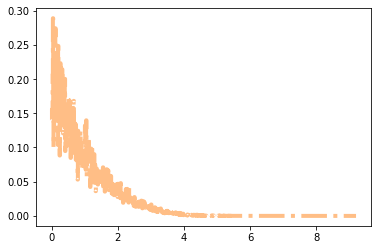

In [184]:
print(len(Halo_fit_amp))
print(Hal_counts_Pakmor.shape)

plt.step(x=np.log(bin_edges[:-1]), y=Hal_counts_Pakmor[1], where='post', ls='-.',lw=4, alpha=0.5, color='C{0}'.format(i-1))

(array([1.70271086e-02, 1.80745377e-02, 1.97223224e-02, 2.15233894e-02,
        2.10507690e-02, 2.36693416e-02, 2.52660322e-02, 2.70798727e-02,
        2.88553926e-02, 2.99028217e-02, 3.17422093e-02, 3.47056670e-02,
        3.75158425e-02, 3.83972157e-02, 4.17566528e-02, 4.50649957e-02,
        4.70448920e-02, 5.06725731e-02, 5.46579129e-02, 5.85666115e-02,
        6.10063547e-02, 6.65883851e-02, 7.04076690e-02, 7.47251204e-02,
        7.95024187e-02, 8.56464842e-02, 8.83672450e-02, 9.33744667e-02,
        9.89181765e-02, 1.06441783e-01, 1.10363255e-01, 1.18959837e-01,
        1.23609400e-01, 1.33189544e-01, 1.38963177e-01, 1.47112686e-01,
        1.56232983e-01, 1.61802239e-01, 1.71459024e-01, 1.81575656e-01,
        1.89571882e-01, 1.99560779e-01, 2.09843466e-01, 2.18159031e-01,
        2.27739175e-01, 2.36054739e-01, 2.44779057e-01, 2.54716859e-01,
        2.66123617e-01, 2.70683765e-01, 2.79267574e-01, 2.88719982e-01,
        2.97789185e-01, 3.03102971e-01, 3.09195943e-01, 3.121338

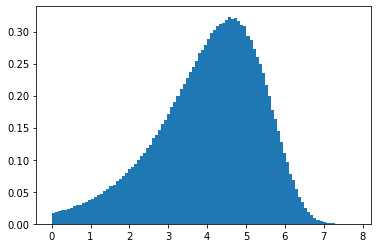

In [165]:
Halo_dist = Halo_Custom_Dist(amp=Halo_fit_amp[-1],loc=Halo_fit_loc[-1],scale=Halo_fit_scale[-1])

n=1000000#1000
samps = Halo_dist.rvs(size=n)
#print(np.array(samps))
plt.hist(samps,bins=100,density=True)

(array([2.83233002e-05, 0.00000000e+00, 0.00000000e+00, 5.66466004e-05,
        5.66466004e-05, 8.49699006e-05, 1.13293201e-04, 3.39879602e-04,
        4.53172803e-04, 5.66466004e-04, 6.79759204e-04, 1.04796211e-03,
        1.95430771e-03, 2.66239022e-03, 3.45544262e-03, 4.56005133e-03,
        5.26813383e-03, 7.39238135e-03, 1.00830949e-02, 1.43882365e-02,
        1.74754762e-02, 2.41031285e-02, 2.94845555e-02, 3.91144776e-02,
        4.91975724e-02, 6.52852069e-02, 7.85121881e-02, 9.41183265e-02,
        1.14369486e-01, 1.40511892e-01, 1.70166388e-01, 2.02624890e-01,
        2.35536564e-01, 2.81307017e-01, 3.29881477e-01, 3.71233496e-01,
        4.28984705e-01, 4.84271787e-01, 5.33667622e-01, 6.01303663e-01,
        6.67835095e-01, 7.20686373e-01, 7.84073919e-01, 8.43184647e-01,
        8.85981153e-01, 9.36255011e-01, 9.85310967e-01, 1.01128343e+00,
        1.03603800e+00, 1.05779029e+00, 1.06640058e+00, 1.05303198e+00,
        1.04912336e+00, 1.03326231e+00, 9.95875558e-01, 9.687135

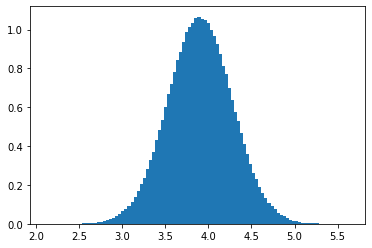

In [153]:
Filament_dist = Filament_Custom_Dist(amp=Fila_fit_amp[0],mean=Fila_fit_mean[0],sigma=Fila_fit_stddev[0])
#Filament_dist = Filament_Custom_Dist(amp=1,mean=0,sigma=1)

n=1000000#1000
samps = Filament_dist.rvs(size=n)
#print(np.array(samps))
plt.hist(samps,bins=100,density=True)


(array([ 1.,  0.,  0.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  5.,
         2.,  4.,  4.,  7.,  4.,  5.,  4.,  2.,  9.,  8.,  6.,  7., 16.,
        12.,  8., 20., 10., 14., 22., 17., 19., 18., 24., 20., 24., 26.,
        20., 22., 16., 21., 32., 31., 20., 24., 14., 24., 23., 17., 21.,
        19., 21., 17., 24., 29., 19., 15., 19., 24., 20., 15., 11., 18.,
        17.,  9., 13.,  7., 11.,  5., 12., 13.,  8.,  7.,  3.,  3., 10.,
         6.,  1.,  2.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([2.27413313, 2.27986979, 2.28560644, 2.29134309, 2.29707975,
        2.3028164 , 2.30855305, 2.31428971, 2.32002636, 2.32576301,
        2.33149966, 2.33723632, 2.34297297, 2.34870962, 2.35444628,
        2.36018293, 2.36591958, 2.37165624, 2.37739289, 2.38312954,
        2.3888662 , 2.39460285, 2.4003395 , 2.40607615, 2.41181281,
        2.41754946, 2.42328611, 2.42902277, 2.43475942, 2.44049607,
        2.44623273, 2.4519

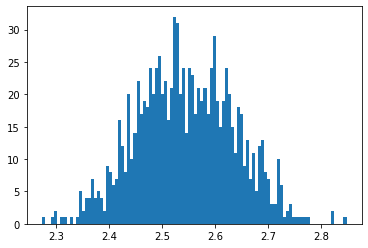

In [142]:
Void_dist = Void_Custom_Dist(amp=Void_fit_amp[0],mean=Void_fit_mean[0],sigma=Void_fit_stddev[0])

n=1000
samps = Void_dist.rvs(size=n)
#print(np.array(samps))
plt.hist(samps,bins=100)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotting redshift: 0.00


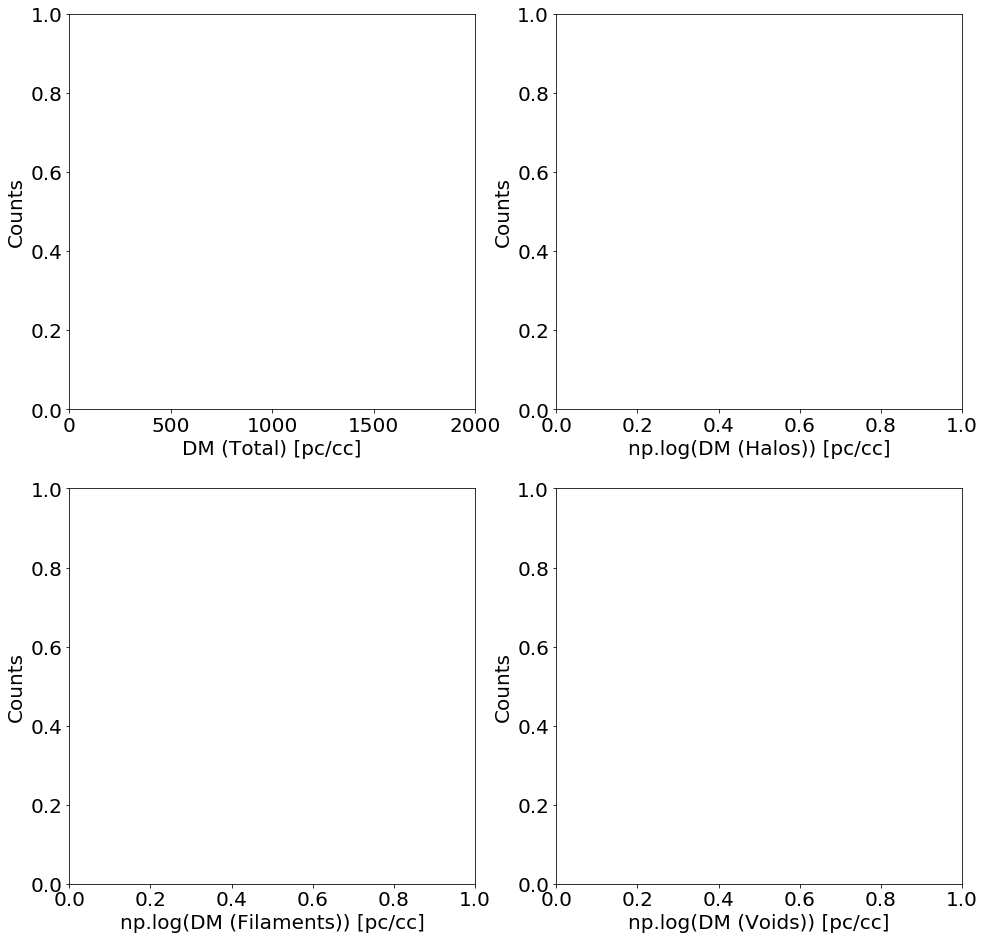

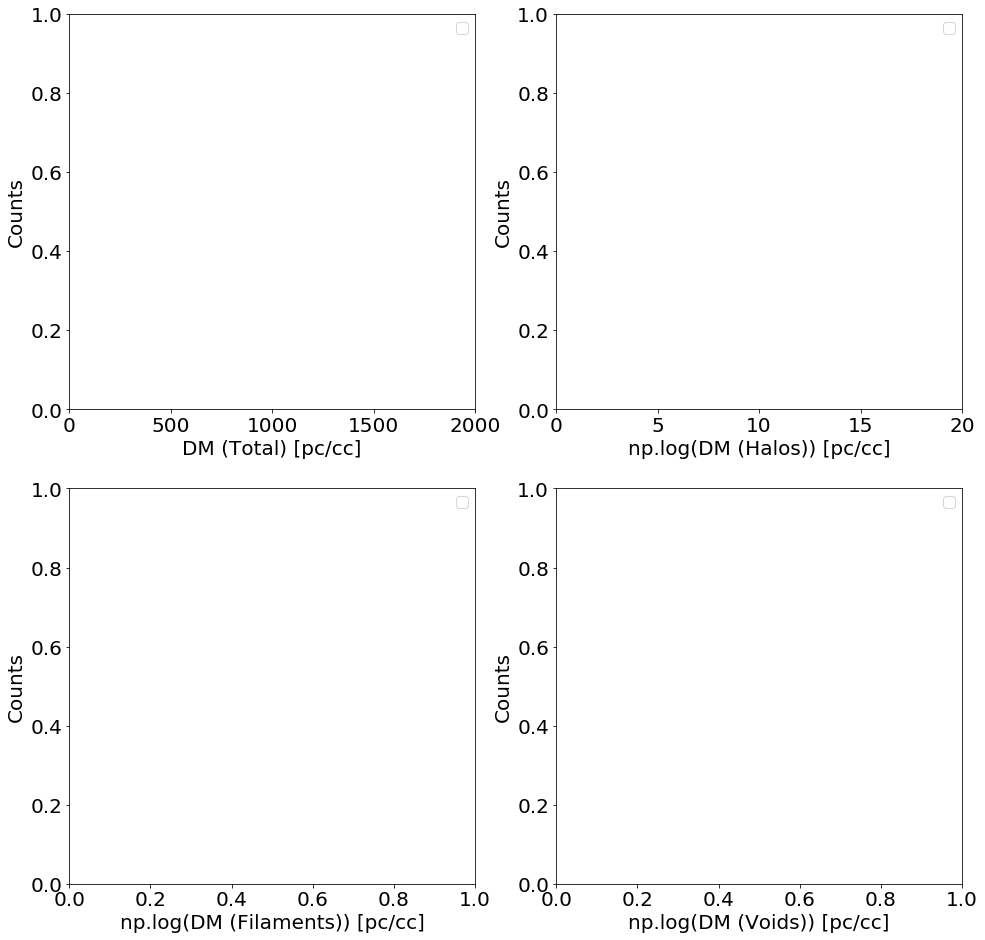

Plotting redshift: 0.10
13.39 -6.83 4.84


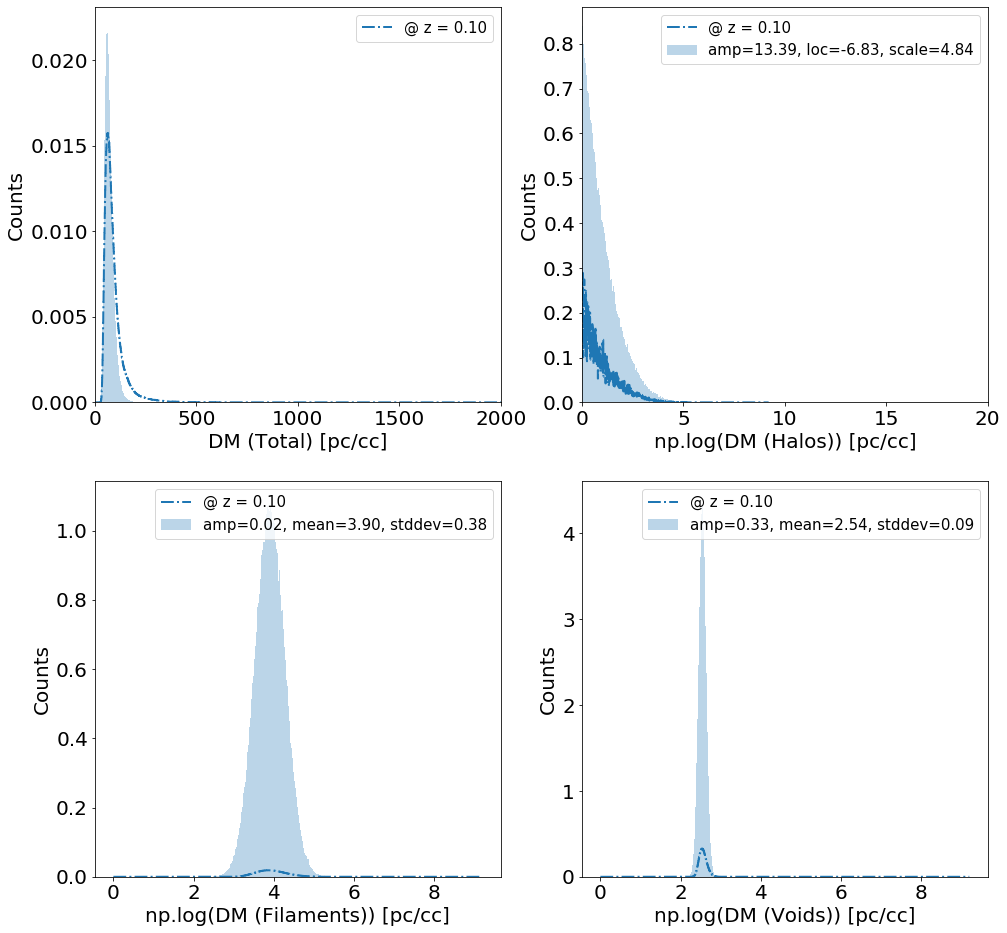

Plotting redshift: 0.20
3.47 -4.79 4.35


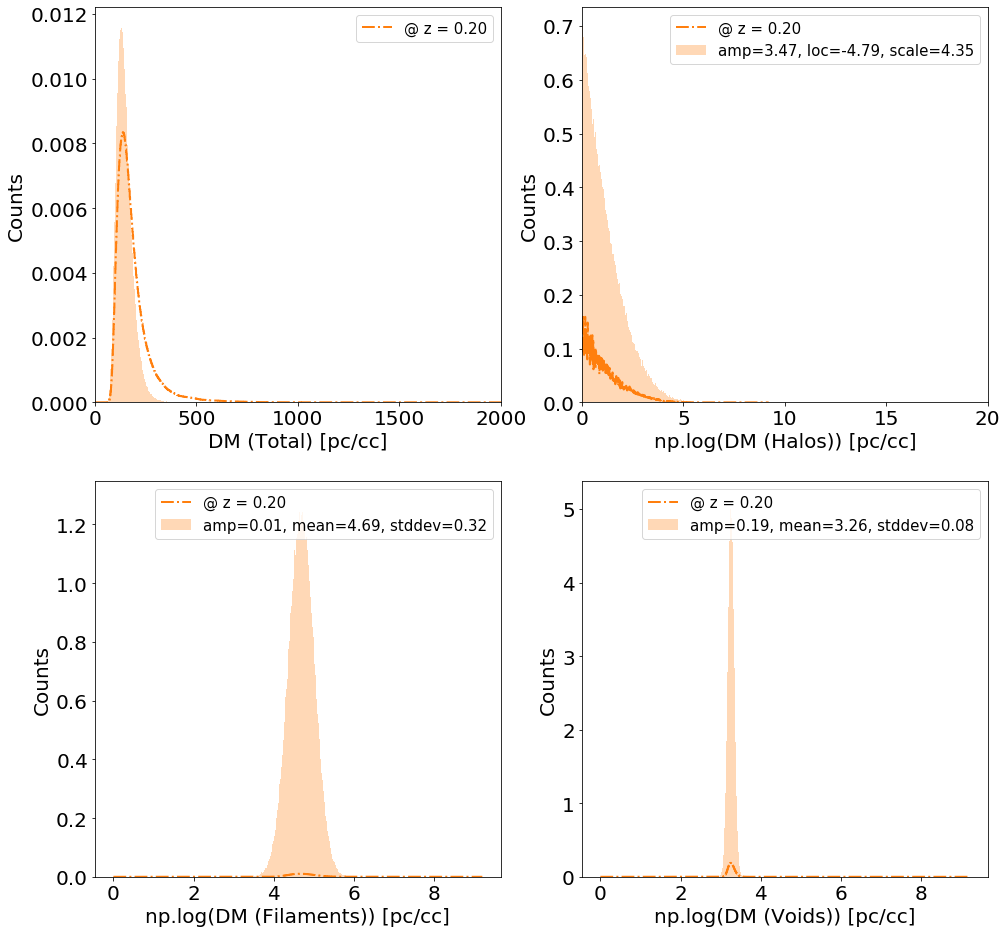

Plotting redshift: 0.30
1.69 -3.98 4.31


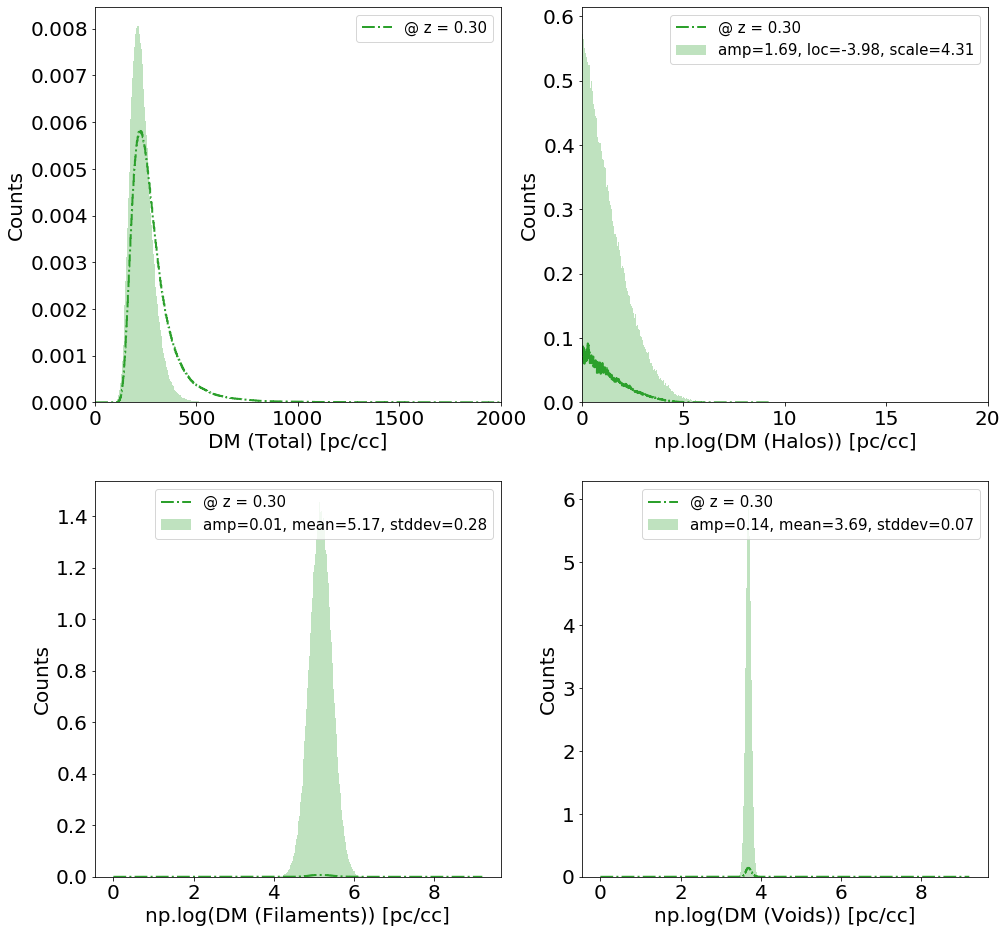

Plotting redshift: 0.40
0.70 -2.47 3.90


In [ ]:
###################
#initialise figure#
###################

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(221)
ax1.set_xlabel('DM (Total) [pc/cc]',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim([0,2000])

ax2 = fig.add_subplot(222)
ax2.set_xlabel('np.log(DM (Halos)) [pc/cc]',fontsize=20)
ax2.set_ylabel('Counts',fontsize=20)
#ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
#ax2.set_xlim([0,6000])

ax3 = fig.add_subplot(223)
ax3.set_xlabel('np.log(DM (Filaments)) [pc/cc]',fontsize=20)
ax3.set_ylabel('Counts',fontsize=20)
#ax3.set_xscale('log')
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
#ax3.set_xlim([0,6000])

ax4 = fig.add_subplot(224)
ax4.set_xlabel('np.log(DM (Voids)) [pc/cc]',fontsize=20)
ax4.set_ylabel('Counts',fontsize=20)
#ax4.set_xscale('log')
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
#ax4.set_xlim([0,6000])

#####################
#loop over snapshots#
#####################

for i in range(len(snap_z_list)): #loop over each fitted snapshot
    print('Plotting redshift: {0:.2f}'.format(snap_z_list[i]))
    
    ###################
    #initialise figure#
    ###################

    fig = plt.figure(figsize=(16,16))

    ax1 = fig.add_subplot(221)
    ax1.set_xlabel('DM (Total) [pc/cc]',fontsize=20)
    ax1.set_ylabel('Counts',fontsize=20)
    #ax1.set_xscale('log')
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_xlim([0,2000])

    ax2 = fig.add_subplot(222)
    ax2.set_xlabel('np.log(DM (Halos)) [pc/cc]',fontsize=20)
    ax2.set_ylabel('Counts',fontsize=20)
    #ax2.set_xscale('log')
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlim([0,20])

    ax3 = fig.add_subplot(223)
    ax3.set_xlabel('np.log(DM (Filaments)) [pc/cc]',fontsize=20)
    ax3.set_ylabel('Counts',fontsize=20)
    #ax3.set_xscale('log')
    ax3.tick_params(axis='x', labelsize=20)
    ax3.tick_params(axis='y', labelsize=20)
    #ax3.set_xlim([0,6000])

    ax4 = fig.add_subplot(224)
    ax4.set_xlabel('np.log(DM (Voids)) [pc/cc]',fontsize=20)
    ax4.set_ylabel('Counts',fontsize=20)
    #ax4.set_xscale('log')
    ax4.tick_params(axis='x', labelsize=20)
    ax4.tick_params(axis='y', labelsize=20)
    
    ###################################
    #skip redshift 0 unfitted snapshot#
    ###################################
    
    if i==0: 
        pass
    
    #########################
    #For all other snapshots#
    #########################
    
    else:
        
        ####################################
        #Draw from our custom distributions#
        ####################################

        #draw from the halo modified gumbel scale distribution
        
        Hal_amp = Halo_fit_amp[i-1] #amplitude
        Hal_loc = Halo_fit_loc[i-1] #location
        Hal_scale = Halo_fit_scale[i-1] #scale
        print('{0:.2f}'.format(Hal_amp),'{0:.2f}'.format(Hal_loc),'{0:.2f}'.format(Hal_scale))
        
        Halo_dist = Halo_Custom_Dist(amp=Hal_amp,loc=Hal_loc,scale=Hal_scale) #create the distribution
        Halo_draws = Halo_dist.rvs(size=1000000) #draw from distribution
        
        
        #draw from the filament lognormal scale distribution
        Fil_amp = Fila_fit_amp[i-1] #amplitude
        Fil_mean = Fila_fit_mean[i-1] #mean
        Fil_stddev = Fila_fit_stddev[i-1] #stddev
        
        Filament_dist = Filament_Custom_Dist(amp=Fil_amp,mean=Fil_mean,sigma=Fil_stddev) #create the distribution
        Fila_draws = Filament_dist.rvs(size=1000000) #draw from the distribution
        
        #draw from the void lognormal scale distribution
        Voi_amp = Void_fit_amp[i-1] #amplitude
        Voi_mean = Void_fit_mean[i-1] #mean
        Voi_stddev = Void_fit_stddev[i-1] #stddev
        
        Void_dist = Void_Custom_Dist(amp=Voi_amp,mean=Voi_mean,sigma=Voi_stddev) #create the distribution
        Void_draws = Void_dist.rvs(size=1000000) #draw from the distribution
        
        ######################################
        #Sum each LSS draw to get total draws#
        ######################################
        #note: sum the exponentials as fits were done in log-space
        
        Sum_Of_Draws = np.exp(Halo_draws)+np.exp(Fila_draws)+np.exp(Void_draws)
        #Sum_Of_Draws = np.exp(Halo_draws+Fila_draws+Void_draws)

        
        
        ############################
        #histogram our custom draws#
        ############################
        #Note:histogram the exponentials as the fits were done in log-space
        bins=1000#=np.logspace(0,4,num=1000)#=1000
        
        #histogram the halo draws
        ax2.hist(Halo_draws,bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1),
                 label='amp={0:.2f}, loc={1:.2f}, scale={2:.2f}'.format(Hal_amp,Hal_loc,Hal_scale))
        #ax2.hist(np.exp(Halo_draws),bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1))
        
        
        ##NOTE: below method is same as one which created the original hists in Pipe_LSS_Analysis_5.ipynb
        #bin_edges_new = np.logspace(0,4,num=1000)
        #out = np.histogram(Halo_draws,bins=bin_edges_new,density=True)
        #data = out[0]
        #ax2.step(x=bin_edges_new[:-1], y=data,where='post')
        
        #histogram the filament draws
        ax3.hist(Fila_draws,bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1),
                 label='amp={0:.2f}, mean={1:.2f}, stddev={2:.2f}'.format(Fil_amp,Fil_mean,Fil_stddev))
        #ax3.hist(np.exp(Fila_draws),bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1))

        #histogram the void draws
        ax4.hist(Void_draws,bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1),
                 label='amp={0:.2f}, mean={1:.2f}, stddev={2:.2f}'.format(Voi_amp,Voi_mean,Voi_stddev))
        #ax4.hist(np.exp(Void_draws),bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1))

        ax1.hist(Sum_Of_Draws,bins=bins,alpha=0.3,density=True,color='C{0}'.format(i-1))

        
        #########################################################
        #overplot the histograms of the original data as a check#
        #########################################################

        #overplot the total DM data
        ax1.step(x=bin_edges[:-1], y=counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        #ax1.step(x=np.log(bin_edges[:-1]), y=counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))

        #overplot the halo data
        #ax2.step(x=bin_edges[:-1], y=Hal_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        ax2.step(x=np.log(bin_edges[:-1]), y=Hal_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))

        #overplot the filament data
        #ax3.step(x=bin_edges[:-1], y=Fil_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        ax3.step(x=np.log(bin_edges[:-1]), y=Fil_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))

        #overplot the void data
        #ax4.step(x=bin_edges[:-1], y=Voi_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        ax4.step(x=np.log(bin_edges[:-1]), y=Voi_counts_Pakmor[i], where='post', alpha=1, lw=2, ls='-.', color='C{0}'.format(i-1),label='@ z = {0:.2f}'.format(snap_z_list[i]))
        
    ax1.legend(fontsize=15)
    ax2.legend(fontsize=15)
    ax3.legend(fontsize=15)
    ax4.legend(fontsize=15)

    plt.show()


In [ ]:
models.